In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [37]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [38]:
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


In [39]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [40]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


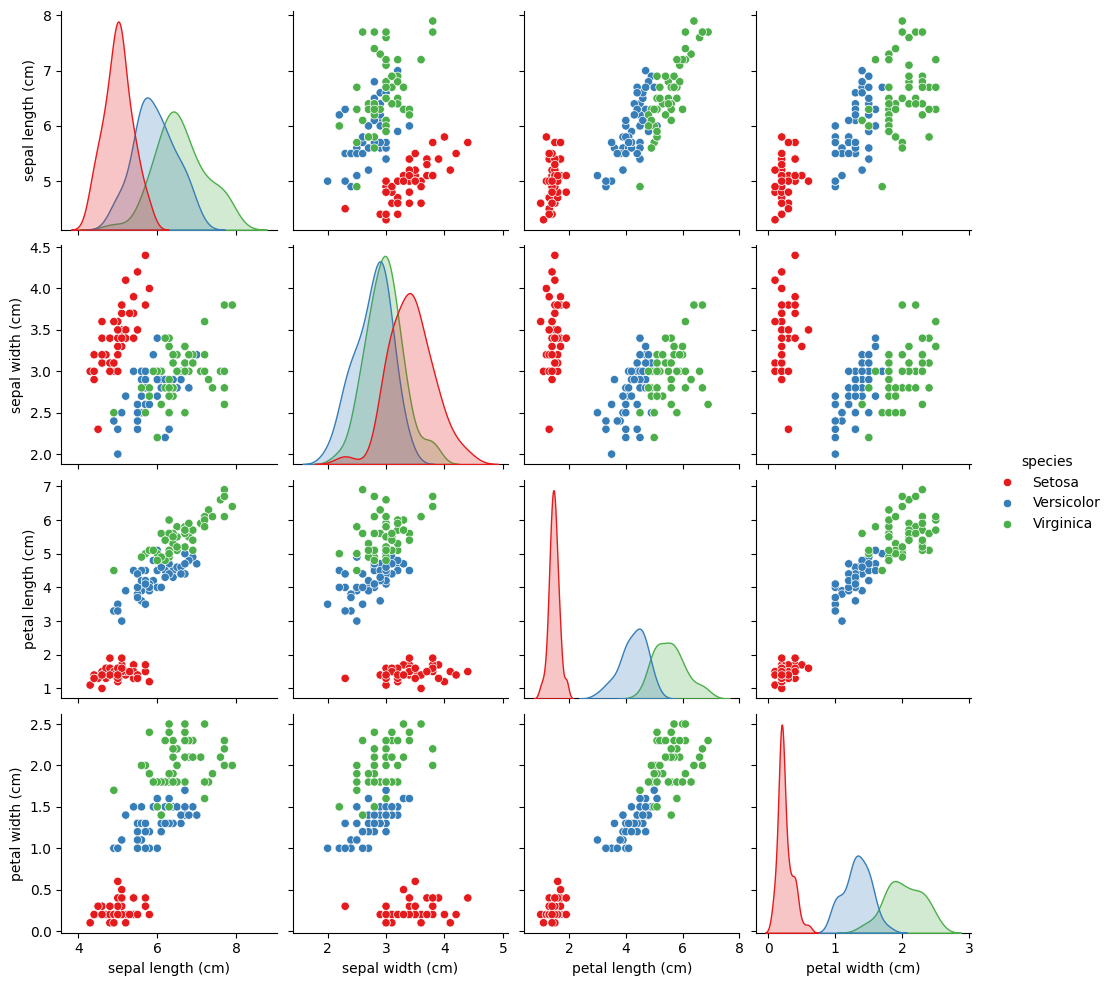

In [41]:
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

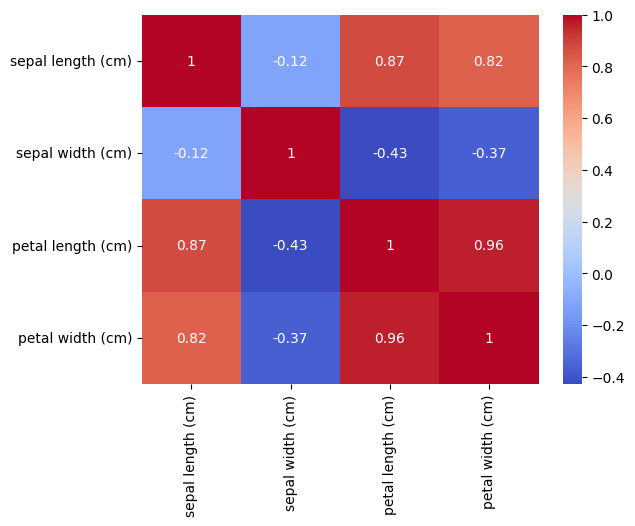

In [42]:
corr_matrix = df.drop('species', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['species'], axis=1))

In [44]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

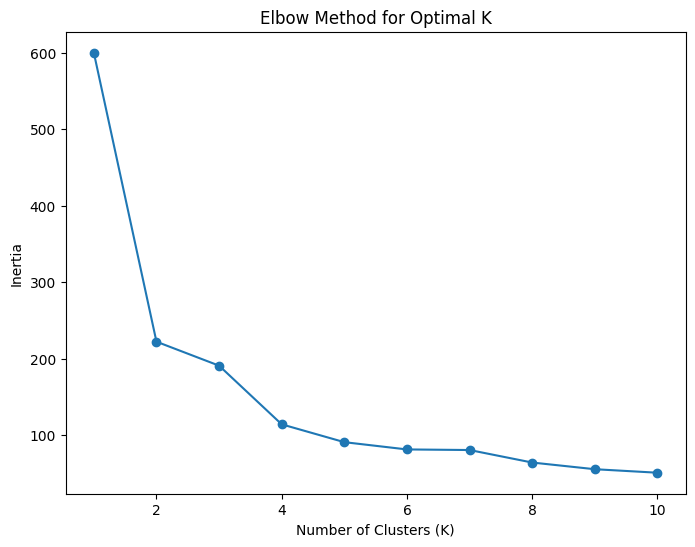

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

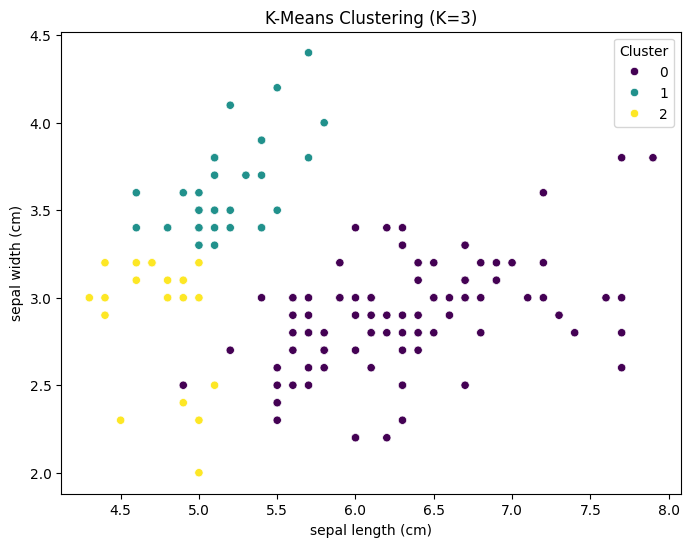

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'], palette='viridis')
plt.title('K-Means Clustering (K=3)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend(title='Cluster')
plt.show()

In [48]:
sil_score = silhouette_score(X_scaled, df['cluster'])
print("\nSilhouette Score:", sil_score)



Silhouette Score: 0.4798814508199817


In [49]:
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)


Cluster Centers (scaled):
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [50]:
import joblib

In [52]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']